In [199]:
#imports libraries
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

**Uploads files**

In [200]:
fashion_df = pd.read_excel(r"C:\Projects\Project Code\Data\Transactions_df.xlsx")

In [201]:
customer_df = pd.read_excel(r'C:\Projects\Project Code\Data\Customers_df.xlsx')

In [202]:
Products_df = pd.read_excel(r'C:\Projects\Project Code\Data\Products_df.xlsx')

**Droping nulls**

In [203]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13394 entries, 0 to 13393
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CashierCustomerCode    13394 non-null  object        
 1   ClubCode               9190 non-null   float64       
 2   DateOfBirth            13394 non-null  datetime64[ns]
 3   CustomerAge            13351 non-null  float64       
 4   CityHebrew             11754 non-null  object        
 5   OpenInBranch           9465 non-null   float64       
 6   CityHebrewIndex        10617 non-null  object        
 7   CityIndexValue         10617 non-null  float64       
 8   CityRank(1 to 255)     10617 non-null  float64       
 9   CityCluster(1 to 10)   10617 non-null  float64       
 10  City                   10617 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.1+ MB


In [204]:
missing = customer_df.isnull()
missing.sum()

CashierCustomerCode         0
ClubCode                 4204
DateOfBirth                 0
CustomerAge                43
CityHebrew               1640
OpenInBranch             3929
CityHebrewIndex          2777
CityIndexValue           2777
CityRank(1 to 255)       2777
CityCluster(1 to 10)     2777
City                     2777
dtype: int64

In [205]:
total_rows = customer_df.shape[0]
total_rows

13394

In [206]:
customer_df.head()

,CashierCustomerCode,ClubCode,DateOfBirth,CustomerAge,CityHebrew,OpenInBranch,CityHebrewIndex,CityIndexValue,CityRank(1 to 255),CityCluster(1 to 10),City
0,1061458,1.0,1969-12-30,44.0,נווה מבטח,106.0,גן רווה,1.430,236.0,8.0,GAN RAWE
1,1061459,NaN,1974-12-04,39.0,נס ציונה,NaN,נס ציונה,1.265,225.0,8.0,NES ZIYYONA
2,106146,NaN,1971-08-05,42.0,10,NaN,NaN,NaN,NaN,NaN,NaN
3,1061460,NaN,1940-03-29,73.0,רחובות,NaN,רחובות,0.629,182.0,7.0,REHOVOT
4,1061461,1.0,1956-03-25,57.0,רחובות,NaN,רחובות,0.629,182.0,7.0,REHOVOT


In [ ]:
# customer_df = customer_df.dropna()
# customer_df.info()

In [207]:
customer_df.dropna(subset=['City'], inplace=True)
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10617 entries, 0 to 13393
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CashierCustomerCode    10617 non-null  object        
 1   ClubCode               7087 non-null   float64       
 2   DateOfBirth            10617 non-null  datetime64[ns]
 3   CustomerAge            10582 non-null  float64       
 4   CityHebrew             10617 non-null  object        
 5   OpenInBranch           7489 non-null   float64       
 6   CityHebrewIndex        10617 non-null  object        
 7   CityIndexValue         10617 non-null  float64       
 8   CityRank(1 to 255)     10617 non-null  float64       
 9   CityCluster(1 to 10)   10617 non-null  float64       
 10  City                   10617 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 995.3+ KB


In [208]:
missing = customer_df.isnull()
missing.sum()

CashierCustomerCode         0
ClubCode                 3530
DateOfBirth                 0
CustomerAge                35
CityHebrew                  0
OpenInBranch             3128
CityHebrewIndex             0
CityIndexValue              0
CityRank(1 to 255)          0
CityCluster(1 to 10)        0
City                        0
dtype: int64

**Drop unrelevant columns**

In [209]:
customer_df.drop(['OpenInBranch','CityHebrewIndex','CityHebrew','ClubCode'], axis=1, inplace=True)
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10617 entries, 0 to 13393
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CashierCustomerCode    10617 non-null  object        
 1   DateOfBirth            10617 non-null  datetime64[ns]
 2   CustomerAge            10582 non-null  float64       
 3   CityIndexValue         10617 non-null  float64       
 4   CityRank(1 to 255)     10617 non-null  float64       
 5   CityCluster(1 to 10)   10617 non-null  float64       
 6   City                   10617 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 663.6+ KB


In [ ]:
#drop rows with missing values in the columns
# customer_df.dropna(axis=0, how='any', inplace=True)
# customer_df.info()

**Transactions cleaning**

In [210]:
fashion_df['transactionDate'] = pd.to_datetime(fashion_df['transactionDate'])

**Merge Transactions and Customers**

In [211]:
customer_df['CustomerID'] = customer_df['CashierCustomerCode'].astype(str)

In [212]:
# change the type of the CustomerID column to string
fashion_df['CustomerID'] = fashion_df['CustomerID'].astype(str)
fashion_df.dtypes

transactionNum                        int64
branchCode                            int64
transactionDate              datetime64[ns]
transactionTime                      object
pricePerUnit                        float64
totalForDeal                        float64
makat                                object
itemAmount                            int64
DiscountPrecent                     float64
NetPricePerUnit                     float64
total                               float64
saleCode                             object
saleDescription                      object
retuenCauseCode                     float64
returnCauseDescription               object
returnCauseComment                   object
IsManualDiscount                     object
isManualPrice                        object
priceAfterDiscount                  float64
effectiveDiscountPrecent            float64
ActualPrice                         float64
generalPrecentageDiscount           float64
ActualProcePerDeal              

In [213]:
customer_df['CustomerID'].astype(str)
fashion_df['CustomerID'].astype(str)

0         10111090
1         10111091
2         10111091
3         10111092
4         10111093
            ...   
189692     1011324
189693     1011324
189694     1011324
189695     1011324
189696     1011324
Name: CustomerID, Length: 189697, dtype: object

In [214]:
#Marge together with the family products
new_all = pd.merge(fashion_df, customer_df, on="CustomerID")
new_all

,transactionNum,branchCode,transactionDate,transactionTime,pricePerUnit,totalForDeal,makat,itemAmount,DiscountPrecent,NetPricePerUnit,...,ActualProcePerDeal,status,CustomerID,CashierCustomerCode,DateOfBirth,CustomerAge,CityIndexValue,CityRank(1 to 255),CityCluster(1 to 10),City
0,1011012090,101,2011-01-01,19:10:00,139.9,139.90,SM9406010XL,1,0.0,139.90,...,139.90,עודפים,10111090,10111090,1965-12-29,48.0,-0.802,61.0,3.0,JERUSALEM
1,1011013090,101,2011-02-20,13:18:00,279.9,279.90,EM8755365L,1,0.0,279.90,...,279.90,עודפים,10111090,10111090,1965-12-29,48.0,-0.802,61.0,3.0,JERUSALEM
2,1011014090,101,2011-05-07,21:57:00,279.9,1340.18,EM7028160XL,1,7.0,260.31,...,260.31,עודפים,10111090,10111090,1965-12-29,48.0,-0.802,61.0,3.0,JERUSALEM
3,1011014090,101,2011-05-07,21:57:00,279.9,1340.18,EM8755160L,1,7.0,260.31,...,260.31,עודפים,10111090,10111090,1965-12-29,48.0,-0.802,61.0,3.0,JERUSALEM
4,1011014090,101,2011-05-07,21:57:00,169.9,1340.18,EM6984022XL,1,30.0,118.93,...,118.93,עודפים,10111090,10111090,1965-12-29,48.0,-0.802,61.0,3.0,JERUSALEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167343,1051026625,105,2014-01-14,19:10:00,259.9,443.98,AL6095565S,1,10.0,233.91,...,233.91,פעיל,1051225,1051225,1969-04-06,44.0,1.153,216.0,8.0,QADIMA-ZORAN
167344,1051026625,105,2014-01-14,19:10:00,799.9,443.98,WL6770439M,1,10.0,719.91,...,719.91,פעיל,1051225,1051225,1969-04-06,44.0,1.153,216.0,8.0,QADIMA-ZORAN
167345,1051027725,105,2014-02-24,20:15:00,1349.9,1079.92,SM8385010S,1,20.0,1079.92,...,1079.92,פעיל,1051225,1051225,1969-04-06,44.0,1.153,216.0,8.0,QADIMA-ZORAN
167346,1051027726,105,2014-02-24,20:21:00,20.0,500.00,RS1234,10,0.0,20.00,...,20.00,פעיל,1051226,1051226,1956-04-22,57.0,1.796,248.0,9.0,RAMAT HASHARON


In [215]:
df_recency = new_all.groupby(by='CustomerID',
						as_index=False)['transactionDate'].max()
df_recency.columns = ['CustomerID', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
	lambda x: (recent_date - x).days)
df_recency.head()

,CustomerID,LastPurchaseDate,Recency
0,10111000,2013-12-15,98
1,10111001,2013-12-15,98
2,10111002,2013-12-15,98
3,10111003,2013-12-15,98
4,10111004,2013-12-15,98


In [216]:
df_recency.tail()

,CustomerID,LastPurchaseDate,Recency
6966,1151661,2014-01-14,68
6967,1151662,2014-01-14,68
6968,1151663,2014-01-14,68
6969,1151664,2014-01-14,68
6970,1151666,2014-01-14,68


In [217]:
temp_df = new_all.drop_duplicates(subset=['transactionNum'], keep='first')

In [218]:
#group by the CustomerID and  transctionNum and count the number of transactions
frequency_df = temp_df.groupby(by='CustomerID',
                        as_index=False)['transactionNum'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df.head()


,CustomerID,Frequency
0,10111000,9
1,10111001,9
2,10111002,9
3,10111003,9
4,10111004,9


In [ ]:
# group by the CustomerID and  transctionNum and count the number of transactions
# df_frequency = new_all.groupby(by='CustomerID',
#                         as_index=False)['transactionDate'].count()
# df_frequency.columns = ['CustomerID', 'Frequency']
# df_frequency.head()

In [219]:
frequency_df.tail()

,CustomerID,Frequency
6966,1151661,2
6967,1151662,2
6968,1151663,2
6969,1151664,2
6970,1151666,2


**Calculating Monetary Value**

In [ ]:
# new_all.set_index('transactionNum', drop=True)
# new_all

In [ ]:
# new_all.drop_duplicates()
# new_all

In [221]:
# new_all['Total'] = new_all['total']
monetary_df = new_all.groupby(by='CustomerID', as_index=False)['total'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()

,CustomerID,Monetary
0,10111000,2693.89
1,10111001,7989.12
2,10111002,3374.14
3,10111003,3935.46
4,10111004,3840.66


In [222]:
monetary_df.tail()

,CustomerID,Monetary
6966,1151661,499.75
6967,1151662,719.70
6968,1151663,150.00
6969,1151664,499.85
6970,1151666,324.85


**Merging all three columns in one dataframe**

In [223]:
rf_df = df_recency.merge(frequency_df, on='CustomerID')
rfm_df = rf_df.merge(monetary_df, on='CustomerID').drop(
    columns='LastPurchaseDate')
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,10111000,98,9,2693.89
1,10111001,98,9,7989.12
2,10111002,98,9,3374.14
3,10111003,98,9,3935.46
4,10111004,98,9,3840.66


**Ranking Customer’s based upon their recency, frequency, and monetary score**

In [224]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,10111000,98,9,2693.89,39.979881,49.791995,49.791995
1,10111001,98,9,7989.12,39.979881,49.791995,49.791995
2,10111002,98,9,3374.14,39.979881,49.791995,49.791995
3,10111003,98,9,3935.46,39.979881,49.791995,49.791995
4,10111004,98,9,3840.66,39.979881,49.791995,49.791995


**Calculating RFM score**

In [225]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
	rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerID', 'RFM_Score']].head(7)

,CustomerID,RFM_Score
0,10111000,2.42
1,10111001,2.42
2,10111002,2.42
3,10111003,2.42
4,10111004,2.42
5,10111005,2.22
6,10111006,2.22


**Rating Customer based upon the RFM score**
rfm score >4.5 : Top Customer

4.5 > rfm score > 4 : High Value Customer

4>rfm score >3 : Medium value customer

3>rfm score>1.6 : Low-value customer

rfm score<1.6 :Lost Customer\

In [226]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
									4.5, "Top Customers",
									(np.where(
										rfm_df['RFM_Score'] > 4,
										"High value Customer",
										(np.where(
	rfm_df['RFM_Score'] > 3,
							"Medium Value Customer",
							np.where(rfm_df['RFM_Score'] > 1.6,
							'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerID', 'RFM_Score', 'Customer_segment']].head(5440)


,CustomerID,RFM_Score,Customer_segment
0,10111000,2.42,Low Value Customers
1,10111001,2.42,Low Value Customers
2,10111002,2.42,Low Value Customers
3,10111003,2.42,Low Value Customers
4,10111004,2.42,Low Value Customers
...,...,...,...
5435,1101393,1.44,Lost Customers
5436,1101394,1.44,Lost Customers
5437,1101395,1.44,Lost Customers
5438,1101396,1.44,Lost Customers


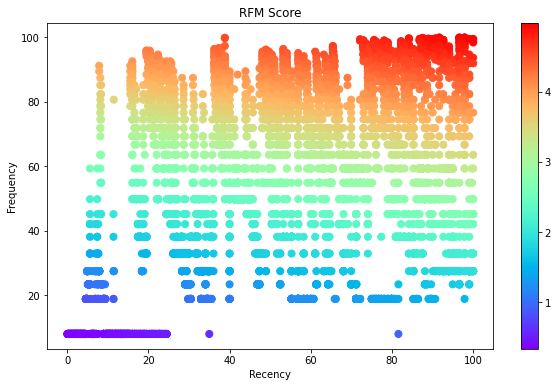

In [227]:
# plot the RFM score
plt.figure(figsize=(10,6))
plt.scatter(rfm_df['R_rank_norm'], rfm_df['F_rank_norm'],
            c=rfm_df['RFM_Score'], cmap='rainbow', s=50)
plt.colorbar()
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM Score')
plt.show()


**Visualizing the customer segments**

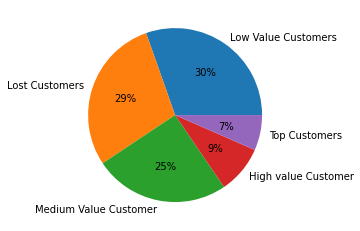

In [228]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

**Predict the amount per day**

In [ ]:
# build a model to predict the 

In [229]:
#Marge together with the family products
new_all = pd.merge(rfm_df, customer_df, on="CustomerID")
new_all

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment,CashierCustomerCode,DateOfBirth,CustomerAge,CityIndexValue,CityRank(1 to 255),CityCluster(1 to 10),City
0,10111000,98,9,2693.89,39.98,49.79,49.79,2.42,Low Value Customers,10111000,1973-05-19,40.0,0.652,188.0,7.0,HAIFA
1,10111001,98,9,7989.12,39.98,49.79,49.79,2.42,Low Value Customers,10111001,2001-01-01,13.0,-0.802,61.0,3.0,JERUSALEM
2,10111002,98,9,3374.14,39.98,49.79,49.79,2.42,Low Value Customers,10111002,1983-11-09,30.0,-0.802,61.0,3.0,JERUSALEM
3,10111003,98,9,3935.46,39.98,49.79,49.79,2.42,Low Value Customers,10111003,1973-08-30,40.0,1.485,241.0,8.0,HOD HASHARON
4,10111004,98,9,3840.66,39.98,49.79,49.79,2.42,Low Value Customers,10111004,2010-03-05,3.0,-0.802,61.0,3.0,JERUSALEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6966,1151661,68,2,499.75,60.62,18.81,18.81,1.25,Lost Customers,1151661,1962-04-03,51.0,1.191,221.0,8.0,KEFAR SAVA
6967,1151662,68,2,719.70,60.62,18.81,18.81,1.25,Lost Customers,1151662,1971-07-30,42.0,1.191,221.0,8.0,KEFAR SAVA
6968,1151663,68,2,150.00,60.62,18.81,18.81,1.25,Lost Customers,1151663,1947-11-07,66.0,1.191,221.0,8.0,KEFAR SAVA
6969,1151664,68,2,499.85,60.62,18.81,18.81,1.25,Lost Customers,1151664,1960-06-11,53.0,1.191,221.0,8.0,KEFAR SAVA


***Clustering***

In [255]:
# make customerID the index
new_all.set_index('CustomerID', drop=True ,inplace=True)
new_all

,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment,CashierCustomerCode,DateOfBirth,CustomerAge,CityIndexValue,CityRank(1 to 255),CityCluster(1 to 10),City
CustomerID,,,,,,,,,,,,,,,
10111000,98,9,2693.89,39.98,49.79,49.79,2.42,Low Value Customers,10111000,1973-05-19,40.0,0.652,188.0,7.0,HAIFA
10111001,98,9,7989.12,39.98,49.79,49.79,2.42,Low Value Customers,10111001,2001-01-01,13.0,-0.802,61.0,3.0,JERUSALEM
10111002,98,9,3374.14,39.98,49.79,49.79,2.42,Low Value Customers,10111002,1983-11-09,30.0,-0.802,61.0,3.0,JERUSALEM
10111003,98,9,3935.46,39.98,49.79,49.79,2.42,Low Value Customers,10111003,1973-08-30,40.0,1.485,241.0,8.0,HOD HASHARON
10111004,98,9,3840.66,39.98,49.79,49.79,2.42,Low Value Customers,10111004,2010-03-05,3.0,-0.802,61.0,3.0,JERUSALEM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1151661,68,2,499.75,60.62,18.81,18.81,1.25,Lost Customers,1151661,1962-04-03,51.0,1.191,221.0,8.0,KEFAR SAVA
1151662,68,2,719.70,60.62,18.81,18.81,1.25,Lost Customers,1151662,1971-07-30,42.0,1.191,221.0,8.0,KEFAR SAVA
1151663,68,2,150.00,60.62,18.81,18.81,1.25,Lost Customers,1151663,1947-11-07,66.0,1.191,221.0,8.0,KEFAR SAVA


In [256]:
features = ['RFM_Score','CityRank(1 to 255)','CustomerAge']

In [257]:
#copy the dataframe to a new dataframe
cluster_df = new_all.copy()


In [258]:
#copy new_all to new_all_features
cluster_df = cluster_df[features]
cluster_df.head()

,RFM_Score,CityRank(1 to 255),CustomerAge
CustomerID,,,
10111000,2.42,188.0,40.0
10111001,2.42,61.0,13.0
10111002,2.42,61.0,30.0
10111003,2.42,241.0,40.0
10111004,2.42,61.0,3.0


In [ ]:
# change the type of the CustomerID column to int
# cluster_df['CustomerID'] = cluster_df['CustomerID'].astype(int)
# cluster_df.dtypes

In [ ]:
#make the CustomerID the index
# cluster_df.set_index('CustomerID', drop=True, inplace=True)
# cluster_df

In [259]:
cluster_df.dtypes

RFM_Score             float64
CityRank(1 to 255)    float64
CustomerAge           float64
dtype: object

In [260]:
#Scale the data
cluster_df = ((cluster_df-cluster_df.min())/(cluster_df.max()-cluster_df.min()))*9+1

In [261]:
cluster_df.describe()

,RFM_Score,CityRank(1 to 255),CustomerAge
count,6971.000000,6971.000000,6941.000000
mean,5.191647,6.803313,5.201592
std,2.607915,2.361714,1.582038
min,1.000000,1.000000,1.000000
25%,3.094828,5.074803,3.819277
50%,5.209052,7.413386,5.120482
75%,7.362069,8.866142,6.313253
max,10.000000,10.000000,10.000000


In [262]:
cluster_df.head()

,RFM_Score,CityRank(1 to 255),CustomerAge
CustomerID,,,
10111000,5.034483,7.625984,5.337349
10111001,5.034483,3.125984,2.409639
10111002,5.034483,3.125984,4.253012
10111003,5.034483,9.503937,5.337349
10111004,5.034483,3.125984,1.325301


In [263]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6971 entries, 10111000 to 1151666
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RFM_Score           6971 non-null   float64
 1   CityRank(1 to 255)  6971 non-null   float64
 2   CustomerAge         6941 non-null   float64
dtypes: float64(3)
memory usage: 217.8+ KB


In [264]:
#sum nans
cluster_df.isnull().sum()

RFM_Score              0
CityRank(1 to 255)     0
CustomerAge           30
dtype: int64

In [265]:
cluster_df.dropna(inplace=True)

In [266]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [267]:
centroids = random_centroids(cluster_df, 5)


In [268]:
centroids

,0,1,2,3,4
RFM_Score,3.754310,4.821121,5.907328,8.894397,5.325431
CityRank(1 to 255),3.125984,9.539370,7.625984,7.661417,4.614173
CustomerAge,5.554217,7.831325,5.120482,4.903614,5.879518


In [269]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [270]:
labels = get_labels(cluster_df, centroids)

In [271]:
labels.value_counts()

2    2219
3    1295
4    1246
1    1216
0     965
dtype: int64

In [272]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [273]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [274]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

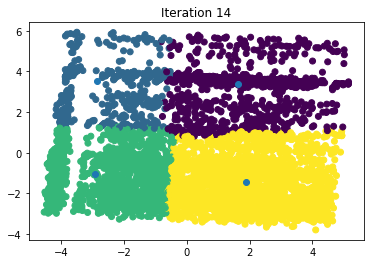

In [275]:
max_iterations = 100
centroid_count = 4

centroids = random_centroids(cluster_df, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(cluster_df, centroids)
    centroids = new_centroids(cluster_df, labels, centroid_count)
    plot_clusters(cluster_df, labels, centroids, iteration)
    iteration += 1

In [276]:
cluster_df.head()

,RFM_Score,CityRank(1 to 255),CustomerAge
CustomerID,,,
10111000,5.034483,7.625984,5.337349
10111001,5.034483,3.125984,2.409639
10111002,5.034483,3.125984,4.253012
10111003,5.034483,9.503937,5.337349
10111004,5.034483,3.125984,1.325301


In [ ]:
# merge cluster_df with fashion_df


# new_all_cluster = pd.merge(cluster_df, new_all, on="CustomerID")
# new_all_cluster.head()


In [277]:
# merge the cluster_df with the new_all_features
new_all_features = pd.merge(new_all, cluster_df, on="CustomerID")
new_all_features.head()


,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score_x,Customer_segment,CashierCustomerCode,DateOfBirth,CustomerAge_x,CityIndexValue,CityRank(1 to 255)_x,CityCluster(1 to 10),City,RFM_Score_y,CityRank(1 to 255)_y,CustomerAge_y
CustomerID,,,,,,,,,,,,,,,,,,
10111000,98,9,2693.89,39.98,49.79,49.79,2.42,Low Value Customers,10111000,1973-05-19,40.0,0.652,188.0,7.0,HAIFA,5.034483,7.625984,5.337349
10111001,98,9,7989.12,39.98,49.79,49.79,2.42,Low Value Customers,10111001,2001-01-01,13.0,-0.802,61.0,3.0,JERUSALEM,5.034483,3.125984,2.409639
10111002,98,9,3374.14,39.98,49.79,49.79,2.42,Low Value Customers,10111002,1983-11-09,30.0,-0.802,61.0,3.0,JERUSALEM,5.034483,3.125984,4.253012
10111003,98,9,3935.46,39.98,49.79,49.79,2.42,Low Value Customers,10111003,1973-08-30,40.0,1.485,241.0,8.0,HOD HASHARON,5.034483,9.503937,5.337349
10111004,98,9,3840.66,39.98,49.79,49.79,2.42,Low Value Customers,10111004,2010-03-05,3.0,-0.802,61.0,3.0,JERUSALEM,5.034483,3.125984,1.325301


In [278]:
# add the cluster for each customer
new_all_features['Cluster'] = labels
new_all_features.tail()



,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score_x,Customer_segment,CashierCustomerCode,DateOfBirth,CustomerAge_x,CityIndexValue,CityRank(1 to 255)_x,CityCluster(1 to 10),City,RFM_Score_y,CityRank(1 to 255)_y,CustomerAge_y,Cluster
CustomerID,,,,,,,,,,,,,,,,,,,
1151661,68,2,499.75,60.62,18.81,18.81,1.25,Lost Customers,1151661,1962-04-03,51.0,1.191,221.0,8.0,KEFAR SAVA,2.765086,8.795276,6.530120,2
1151662,68,2,719.70,60.62,18.81,18.81,1.25,Lost Customers,1151662,1971-07-30,42.0,1.191,221.0,8.0,KEFAR SAVA,2.765086,8.795276,5.554217,2
1151663,68,2,150.00,60.62,18.81,18.81,1.25,Lost Customers,1151663,1947-11-07,66.0,1.191,221.0,8.0,KEFAR SAVA,2.765086,8.795276,8.156627,2
1151664,68,2,499.85,60.62,18.81,18.81,1.25,Lost Customers,1151664,1960-06-11,53.0,1.191,221.0,8.0,KEFAR SAVA,2.765086,8.795276,6.746988,2
1151666,68,2,324.85,60.62,18.81,18.81,1.25,Lost Customers,1151666,1962-08-14,51.0,0.133,143.0,5.0,OR YEHUDA,2.765086,6.031496,6.530120,2


In [279]:
new_all_features.head(10)

,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score_x,Customer_segment,CashierCustomerCode,DateOfBirth,CustomerAge_x,CityIndexValue,CityRank(1 to 255)_x,CityCluster(1 to 10),City,RFM_Score_y,CityRank(1 to 255)_y,CustomerAge_y,Cluster
CustomerID,,,,,,,,,,,,,,,,,,,
10111000,98,9,2693.89,39.98,49.79,49.79,2.42,Low Value Customers,10111000,1973-05-19,40.0,0.652,188.0,7.0,HAIFA,5.034483,7.625984,5.337349,3
10111001,98,9,7989.12,39.98,49.79,49.79,2.42,Low Value Customers,10111001,2001-01-01,13.0,-0.802,61.0,3.0,JERUSALEM,5.034483,3.125984,2.409639,0
10111002,98,9,3374.14,39.98,49.79,49.79,2.42,Low Value Customers,10111002,1983-11-09,30.0,-0.802,61.0,3.0,JERUSALEM,5.034483,3.125984,4.253012,0
10111003,98,9,3935.46,39.98,49.79,49.79,2.42,Low Value Customers,10111003,1973-08-30,40.0,1.485,241.0,8.0,HOD HASHARON,5.034483,9.503937,5.337349,3
10111004,98,9,3840.66,39.98,49.79,49.79,2.42,Low Value Customers,10111004,2010-03-05,3.0,-0.802,61.0,3.0,JERUSALEM,5.034483,3.125984,1.325301,0
10111005,98,8,1601.32,39.98,45.16,45.16,2.22,Low Value Customers,10111005,2010-09-07,3.0,1.244,224.0,8.0,ZIKHRON YA'AQOV,4.646552,8.901575,1.325301,3
10111006,98,8,3654.78,39.98,45.16,45.16,2.22,Low Value Customers,10111006,1945-03-11,68.0,-0.802,61.0,3.0,JERUSALEM,4.646552,3.125984,8.373494,0
10111007,98,8,2678.55,39.98,45.16,45.16,2.22,Low Value Customers,10111007,1986-03-31,27.0,-0.802,61.0,3.0,JERUSALEM,4.646552,3.125984,3.927711,0
10111008,98,8,3504.96,39.98,45.16,45.16,2.22,Low Value Customers,10111008,1963-09-01,50.0,-0.802,61.0,3.0,JERUSALEM,4.646552,3.125984,6.421687,0


In [280]:
# merge the new_all_features with the fashion_df
new_all_features_fashion = pd.merge(new_all_features, fashion_df, on="CustomerID")
new_all_features_fashion.head()


,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score_x,Customer_segment,CashierCustomerCode,...,returnCauseDescription,returnCauseComment,IsManualDiscount,isManualPrice,priceAfterDiscount,effectiveDiscountPrecent,ActualPrice,generalPrecentageDiscount,ActualProcePerDeal,status
0,10111000,98,9,2693.89,39.98,49.79,49.79,2.42,Low Value Customers,10111000,...,NaN,NaN,Y,NaN,349.93,30.0,349.93,0.0,349.93,עודפים
1,10111000,98,9,2693.89,39.98,49.79,49.79,2.42,Low Value Customers,10111000,...,NaN,NaN,NaN,NaN,149.90,0.0,149.90,0.0,149.90,עודפים
2,10111000,98,9,2693.89,39.98,49.79,49.79,2.42,Low Value Customers,10111000,...,NaN,NaN,NaN,NaN,149.90,0.0,149.90,0.0,149.90,עודפים
3,10111000,98,9,2693.89,39.98,49.79,49.79,2.42,Low Value Customers,10111000,...,NaN,NaN,NaN,NaN,199.90,0.0,199.90,0.0,199.90,עודפים
4,10111000,98,9,2693.89,39.98,49.79,49.79,2.42,Low Value Customers,10111000,...,NaN,NaN,NaN,NaN,339.90,0.0,339.90,0.0,339.90,עודפים


In [282]:
# new_all_features_fashion features
new_all_features_fashion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166560 entries, 0 to 166559
Data columns (total 44 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   CustomerID                 166560 non-null  object        
 1   Recency                    166560 non-null  int64         
 2   Frequency                  166560 non-null  int64         
 3   Monetary                   166560 non-null  float64       
 4   R_rank_norm                166560 non-null  float64       
 5   F_rank_norm                166560 non-null  float64       
 6   M_rank_norm                166560 non-null  float64       
 7   RFM_Score_x                166560 non-null  float64       
 8   Customer_segment           166560 non-null  object        
 9   CashierCustomerCode        166560 non-null  object        
 10  DateOfBirth                166560 non-null  datetime64[ns]
 11  CustomerAge_x              166560 non-null  float64 

In [ ]:
# build a model to predict the 

In [ ]:
# merge new_all with fashion_df
new_all_fashion = pd.merge(new_all, fashion_df, on="CustomerID")
new_all_fashion.head()

In [285]:
# merge the new_all_features_fashion with the Product_df
new_all_features_fashion_product = pd.merge(new_all_features_fashion, Products_df, on="makat")

In [286]:
new_all_features_fashion_product.head()


,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score_x,Customer_segment,CashierCustomerCode,...,productFamily,familiydescription,class1,class2,class3,paritMerakez,customerPrice,gender,seaseon,status_y
0,10111000,98,9,2693.89,39.98,49.79,49.79,2.42,Low Value Customers,10111000,...,31,seasonal clothing,fashion coat,Outerwear,coats,SM5250,499.9,male,F10,outlet
1,10111246,91,15,5998.29,44.20,71.88,71.88,3.39,Medium Value Customer,10111246,...,31,seasonal clothing,fashion coat,Outerwear,coats,SM5250,499.9,male,F10,outlet
2,10111315,88,9,3633.65,45.17,49.79,49.79,2.45,Low Value Customers,10111315,...,31,seasonal clothing,fashion coat,Outerwear,coats,SM5250,499.9,male,F10,outlet
3,10111587,76,15,6483.20,52.45,71.88,71.88,3.45,Medium Value Customer,10111587,...,31,seasonal clothing,fashion coat,Outerwear,coats,SM5250,499.9,male,F10,outlet
4,10111698,72,12,3355.41,56.89,63.56,63.56,3.13,Medium Value Customer,10111698,...,31,seasonal clothing,fashion coat,Outerwear,coats,SM5250,499.9,male,F10,outlet


In [290]:
new_all_features_fashion_product.class3.unique()

array(['coats', 'Accessories', 'Shirts', 'pants', 'equipment', 'footwear',
       nan], dtype=object)

In [ ]:
# change 'class3' values to numeical values
new_all_features_fashion_product.class3.replace(['coats', 'Accessories', 'Shirts', 'pants', 'equipment', 'footwear'], [1, 2, 3, 4, 5, 6], inplace=True)
new_all_features_fashion_product.loc[new_all_features_fashion_product['Class'] == '3', 'Class'] = 3

In [ ]:
new_all_features_fashion_product.info()


In [ ]:
# new_all_features_fashion_product group by transaction_date
new_all_features_fashion_product_group = new_all_features_fashion_product.groupby(['transaction_date'])
new_all_features_fashion_product_group.head()

In [ ]:
# build model to predict the total amount of money spent per day
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

In [ ]:
# split the data into train and test
X = new_all_features_fashion_product[['Cluster']]
y = new_all_features_fashion_product['total']

In [ ]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# create the model
model = LinearRegression()


In [ ]:
# train the model
model.fit(X_train, y_train)


In [ ]:
# predict the test data
y_pred = model.predict(X_test)


In [ ]:
# evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('Explained Variance Score:', explained_variance_score(y_test, y_pred))


In [ ]:
# plot the model
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


In [ ]:
# new_all_features_fashion features
new_all_features_fashion.makat


In [ ]:
# build the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support



In [ ]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(new_all_features_fashion['total'], new_all_features_fashion['Cluster'], test_size=0.2, random_state=42)


In [ ]:
# train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


In [ ]:
# build a new dataframe with the cluster labels
cluster_df['cluster'] = labels
cluster_df.head(10)


In [ ]:
# build a recommendation system based on the cluster labels and RFM_Score
cluster_df.groupby('cluster').mean()


In [ ]:
#keep only the columns we need
X = new_all[['RFM_Score','CityRank(1 to 255)','CustomerAge', 'total']]
X.head()

In [ ]:
#nermalize the data
X = X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X.head()

In [ ]:
#distortion of the data
X.describe()


In [ ]:
X.dropna(inplace=True)

In [ ]:
#k means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)
labels


In [ ]:
#plot clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=50, cmap='viridis')
plt.show()


In [ ]:
distortions = []
K = range(1, 10)
for k in K:
    kmeansModel = KMeans(n_clusters = k, init = 'k-means++',    random_state = 23)
    kmeansModel.fit(X)
    distortions.append(kmeansModel.inertia_)
plt.plot(K, distortions)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("S.S.E.")
plt.show()

In [ ]:
#kmeans
kmeansModel = KMeans(n_clusters = 4, init = 'k-means++',    random_state = 23)
kmeansModel.fit(X)
cluster_labels = kmeansModel.labels_
cluster_labels


In [ ]:
#plotting the cluster_labels
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=cluster_labels, cmap='rainbow')
plt.show()



**Another Clustering**

In [ ]:
new_all.head(10)

In [ ]:
plt.scatter(new_all.CityIndexValue ,new_all['RFM_Score'])
plt.xlabel('CityIndexValue')
plt.ylabel('RFM_Score')

In [ ]:
#model building for recommender system
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# recommendation system
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=0)


In [ ]:
# fit the training data to the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


In [ ]:
# y_pred change to binary
y_pred = model.predict(X_test)
y_pred = y_pred.astype(bool)


In [ ]:
# y_test change to binary
y_test = y_test.astype(bool)



In [ ]:
y_test

In [ ]:
y_pred

In [ ]:
# make predictions on the testing set
y_pred = model.predict(X_test)


In [ ]:
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))



In [ ]:
# plot the roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
# load the data
reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_file('ratings.csv', reader=reader)
